> # 로지스틱 회귀

___
> ## 손실함수의 차이

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def plot_boundary(w):
  x = np.arange(-1.0, 1.1, 0.1)
  y = eval('%f*x + %f' % ((-w[1] / (w[2]+1e-6)), (-w[0]/(w[2]+1e-6))))
  plt.plot(x, y, linewidth = 2)
  
  
# scatter plot 함수 (개인 버전)
def plot_scatter():
  sns.lmplot('x0', 'x1', hue = 'y', data = dataset, fit_reg= False)
  plt.ylim(-1, 1)
  plt.xlim(-1,1)

- 퍼셉트론에서의 손실합수는 합리적이지만 식별 경계를 100% 구분하는 순간 손실이 0이 되어 학습을 멈춤
- 하지만 다음 예에서 볼 수 있듯이, 퍼셉트론의 손실함수로 찾아낸 판별식은 매우 효율적인 판별식이 아닐 수도 있음

In [3]:
X_dataset, y_dataset = make_blobs(centers=[[-0.3, 0.5], [0.3, -0.2]],
                                  cluster_std=0.2,
                                  n_samples=100,
                                  center_box=(-1.0, 1.0),
                                  random_state=42)
dataset = pd.DataFrame(X_dataset, columns=['x0', 'x1'])
dataset['y'] = y_dataset
dataset['y'] = dataset.y.apply(lambda x: 1 if x == 1 else -1)

In [4]:
def train(dataset, epochs=1):
    learning_rate = 1.0
    w = np.array([0.0, 0.0, 1.0])  # 초깃값
    for epoch in range(epochs):
        for i, (x0, x1, y) in dataset.iterrows():
            x = np.array([1.0, x0, x1])
            if y * np.dot(w, x) > 0:
                pass  # 괜찮다면 아무 처리도 하지 않기
            else:
                w += learning_rate * y * x

    return w

[ 0.          1.48665224 -0.98906527]


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


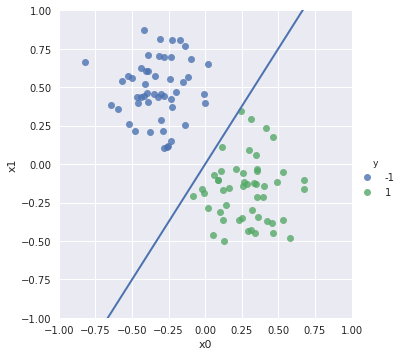

In [17]:
w = train(dataset=dataset,
          epochs=20)
print(w)
plot_scatter()
plot_boundary(w)

- 위의 판별식의 경우 오분류가 0으로 퍼셉트론의 손실함수도 0이 됨 (손실함수가 0이되는 순간 학습이 멈춤)
- 하지만 판별식은 `y = 1`에 치우처져 있음을 볼 수 있고, 이는 최선의 판별식이라고 하기는 어려움